# Setup
## Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import scipy

from generative_social_choice.utils.helper_functions import get_base_dir_path
from generative_social_choice.slates.voting_utils import gini
from generative_social_choice.ratings.utility_matrix import extract_voter_utilities_from_info_csv
from generative_social_choice.utils.postprocessing import (
    plot_sorted_utility_distributions,
    plot_likert_category_clustered_bar_chart,
    scalar_utility_metrics,
    plot_candidate_distribution_stacked,
    
)


# Embedding Ablation

## Single-Run Plots

In [3]:
# bjr_with_baseline_embeddings_paths = get_results_paths(labelling_model=LABELLING_MODEL, embedding_type="seed_statement", baseline=False)

bjr_with_baseline_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-232314__generate_slate_via_fish_nn" / "info.csv"
bjr_with_baseline_embeddings = extract_voter_utilities_from_info_csv(bjr_with_baseline_embeddings_path)
bjr_with_baseline_embeddings.head()

,candidate_id,utility
Voter,,
generation1,18,3.652164
generation10,3,3.996646
generation100,17,3.871335
generation11,9,3.996955
generation12,18,3.389729


In [4]:
bjr_with_openai_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-235156__generate_slate_via_openai_embeddings_nn" / "info.csv"
df_bjr_with_openai_embeddings = extract_voter_utilities_from_info_csv(bjr_with_openai_embeddings_path)
df_bjr_with_openai_embeddings.head()

,candidate_id,utility
Voter,,
generation1,13,3.898625
generation10,13,3.990606
generation100,13,3.872195
generation11,6,3.996033
generation12,21,3.950161


In [5]:
embedding_ablation_utilities = pd.concat([
    bjr_with_baseline_embeddings.utility.rename("Baseline Embeddings"),
    df_bjr_with_openai_embeddings.utility.rename("OpenAI Embeddings")
],
axis=1)
embedding_ablation_utilities

,Baseline Embeddings,OpenAI Embeddings
Voter,,
generation1,3.652164,3.898625
generation10,3.996646,3.990606
generation100,3.871335,3.872195
generation11,3.996955,3.996033
generation12,3.389729,3.950161
...,...,...
generation95,2.217852,3.940947
generation96,3.989112,3.995287
generation97,3.526558,3.087988


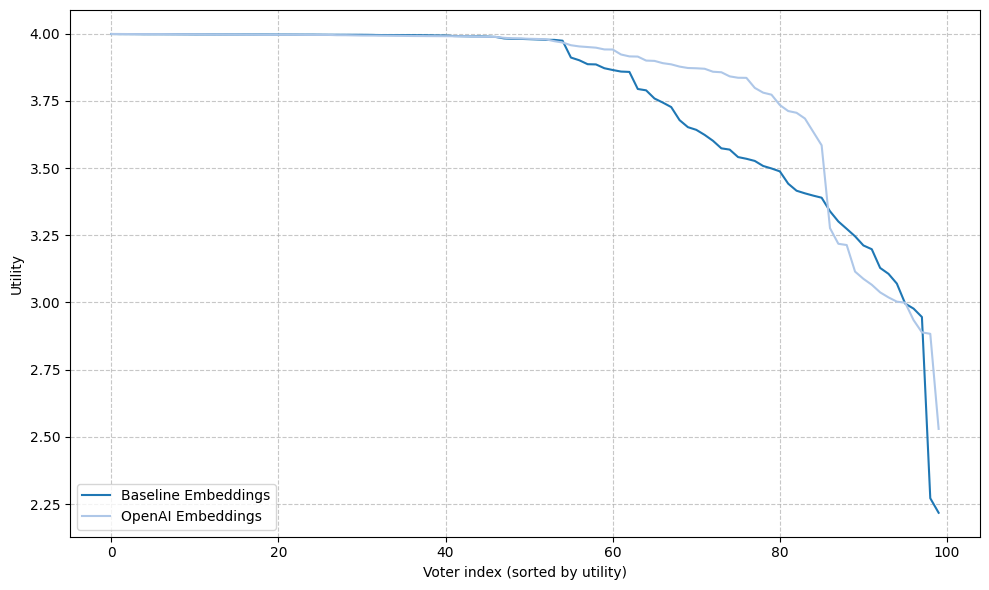

In [6]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_fig = plot_sorted_utility_distributions(embedding_ablation_utilities)

In [7]:
scalar_utility_metrics(embedding_ablation_utilities)

,Avg_Utility,Min_Utility,25th_Pctile_Utility,Gini
Baseline Embeddings,3.752362,2.217852,3.561705,0.046244
OpenAI Embeddings,3.809875,2.529911,3.839772,0.037781


## Multi-run

In [16]:
baseline_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_fish_nn*")
baseline_files = [d / "info.csv" for d in baseline_embedding_run_dirs]

baseline_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(baseline_files)
], axis=1)
baseline_utilities.columns = pd.MultiIndex.from_product([
    ["Baseline Embedding"], 
    baseline_utilities.columns
])

baseline_utilities.head()

Baseline Embedding                                          \
                              0         1         2         3         4    
Voter                                                                      
generation1             3.652164  3.419756  3.930224  3.734451  3.674032   
generation10            3.996646  3.995768  3.968564  3.993362  3.995934   
generation100           3.871335  3.935093  3.602703  3.954936  3.935633   
generation11            3.996955  3.996189  3.992691  3.992591  3.996861   
generation12            3.389729  3.505447  3.721042  3.323329  3.832001   

                                                                           \
                     5         6         7         8         9         10   
Voter                                                                       
generation1    3.745700  3.820981  3.880952  3.752212  3.030603  3.661828   
generation10   3.989841  3.982060  3.991400  3.991635  3.986091  3.977244   
generation100  3.981460  3.931086  3.974949  3.974638  3.951919  3.833347   
generation11   3.998290  3.996564  3.993663  3.988286  3.990560  3.994410   
generation12   3.874439  3.926348  3.959825  3.533877  3.789801  3.742299   

                                                       
                     11        12        13        14  
Voter                                                  
generation1    3.873203  3.741641  3.885651  3.737227  
generation10   3.993327  3.992796  3.992937  3.991566  
generation100  3.973459  3.930262  3.744832  3.909553  
generation11   3.995822  3.997563  3.998377  3.992067  
generation12   3.964456  3.826039  3.779725  3.943519

In [17]:
baseline_utilities.isna().sum()

Baseline Embedding  0     0
                    1     0
                    2     0
                    3     0
                    4     0
                    5     0
                    6     0
                    7     0
                    8     0
                    9     0
                    10    0
                    11    0
                    12    0
                    13    0
                    14    0
dtype: int64

In [18]:
openai_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_openai_embeddings*")
openai_embedding_files = [d / "info.csv" for d in openai_embedding_run_dirs]

openai_embedding_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(openai_embedding_files)
], axis=1)
openai_embedding_utilities.columns = pd.MultiIndex.from_product([
    ["OpenAI Embedding"], 
    openai_embedding_utilities.columns
])

openai_embedding_utilities.head()

OpenAI Embedding                                          \
                            0         1         2         3         4    
Voter                                                                    
generation1           3.898625  3.849859  3.889442  3.866531  3.875725   
generation10          3.990606  3.988506  3.994331  3.984539  3.978862   
generation100         3.872195  3.969437  3.894820  3.957064  3.847609   
generation11          3.996033  3.995450  3.993444  3.995308  3.995216   
generation12          3.950161  3.845123  3.927704  3.699785  3.829483   

                                                                           \
                     5         6         7         8         9         10   
Voter                                                                       
generation1    3.884814  3.888730  3.926437  3.702923  3.908730  3.911004   
generation10   3.993923  3.981263  3.983981  3.992733  3.994130  3.994777   
generation100  3.964658  3.987260  3.881054  3.945124  3.832208  3.731572   
generation11   3.995268  3.991671  3.990865  3.998637  3.992289  3.985426   
generation12   3.923565  3.597991  3.245304  3.904311  3.811111  3.549501   

                                                       
                     11        12        13        14  
Voter                                                  
generation1    3.909995  3.929690  3.847205  3.795804  
generation10   3.991748  3.984067  3.974623  3.941821  
generation100  3.865943  3.882379  3.930104  3.933105  
generation11   3.996081  3.997326  3.996422  3.994631  
generation12   3.168546  3.731311  3.952158  3.675798

In [19]:
all_multirun_utilities = pd.concat([
    baseline_utilities,
    openai_embedding_utilities
], axis=1)

(65.0, 100.0)

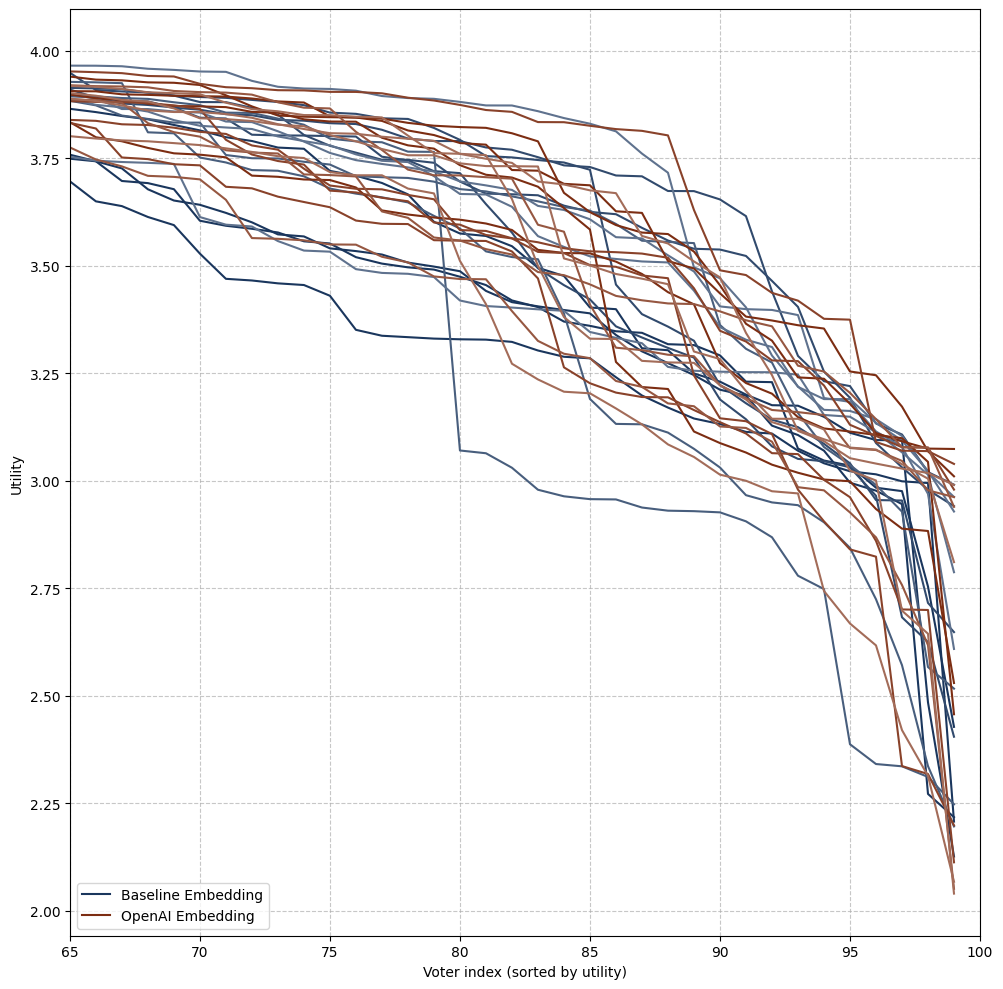

In [59]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_multi_fig = plot_sorted_utility_distributions(
    all_multirun_utilities.dropna(axis=1, how="any"),
    figsize=(10, 10)
)
embedding_ablation_multi_fig.axes[0].set_xlim(65, 100)


G:\Other computers\My Computer\NTFS\dev\generative_social_choice\generative_social_choice\utils\postprocessing.py:128: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for group_name, group_data in groups:


(50.0, 100.0)

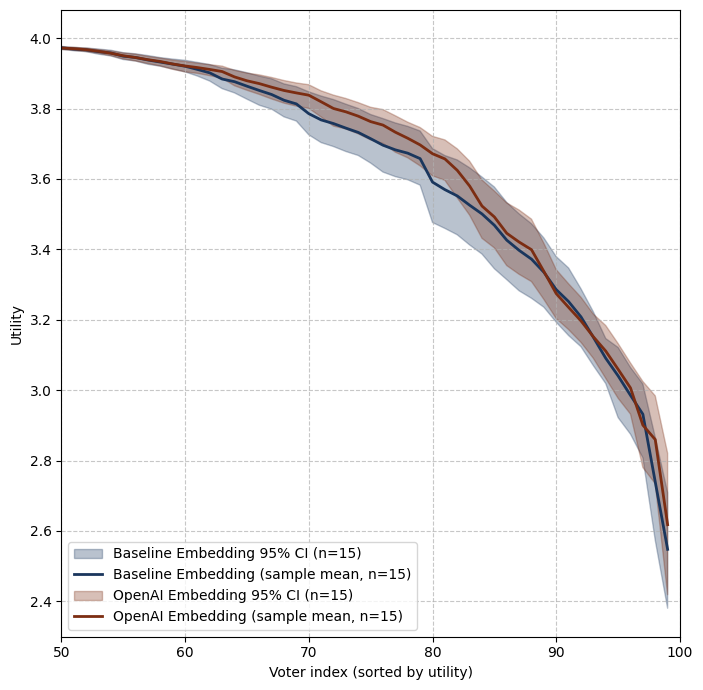

In [65]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_CIs

embedding_ablation_multi_fig = plot_sorted_utility_CIs(
    all_multirun_utilities.dropna(axis=1, how="any"),
    confidence_level=0.95,
    figsize=(7, 7),
)
embedding_ablation_multi_fig.axes[0].set_xlim(50, 100)

In [66]:
scalar_metrics_per_run = scalar_utility_metrics(all_multirun_utilities)
scalar_metrics_per_run

Avg Utility  Min Utility  p25 Utility      Gini
Baseline Embedding 0      3.752362     2.217852     3.561705  0.046244
                   1      3.757577     2.427896     3.556035  0.043713
                   2      3.793090     2.126395     3.759668  0.039516
                   3      3.728445     2.207554     3.449368  0.049225
                   4      3.866658     2.991169     3.836407  0.025128
                   5      3.801209     2.404961     3.802960  0.039367
                   6      3.829539     2.648317     3.869663  0.033449
                   7      3.853367     2.941274     3.798397  0.027757
                   8      3.759361     2.196294     3.701363  0.048092
                   9      3.721605     2.247758     3.820382  0.057027
                   10     3.819782     2.516829     3.740680  0.034673
                   11     3.882337     2.962672     3.912434  0.023961
                   12     3.831422     2.928765     3.787936  0.031347
                   13     3.769321     2.787602     3.535108  0.041042
                   14     3.835637     2.609113     3.782729  0.030518
OpenAI Embedding   0      3.809875     2.529911     3.839772  0.037781
                   1      3.862189     3.074265     3.846868  0.026516
                   2      3.861006     3.010655     3.872018  0.025974
                   3      3.800434     2.457202     3.700775  0.036381
                   4      3.822024     2.979752     3.716425  0.032681
                   5      3.889059     3.039496     3.907438  0.021602
                   6      3.763429     2.112853     3.645687  0.045886
                   7      3.780067     2.198780     3.720614  0.043518
                   8      3.830190     2.962403     3.867684  0.033417
                   9      3.816860     2.939657     3.712496  0.033456
                   10     3.740567     2.051185     3.557218  0.048842
                   11     3.736520     2.067678     3.742854  0.051996
                   12     3.811174     2.040068     3.819843  0.037157
                   13     3.823066     2.811042     3.850872  0.034695
                   14     3.842460     2.990629     3.816054  0.029700

In [67]:
from generative_social_choice.utils.postprocessing import bootstrap_df_rows

scalar_confidence_intervals = bootstrap_df_rows(scalar_metrics_per_run, confidence_level=0.95, n_bootstrap=400)
scalar_confidence_intervals

G:\Other computers\My Computer\NTFS\dev\generative_social_choice\generative_social_choice\utils\postprocessing.py:128: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for group_name, group_data in groups:


Avg Utility  Min Utility  p25 Utility  \
                   statistic                                            
Baseline Embedding lower bound     3.777459     2.390987     3.662024   
                   mean            3.800114     2.547630     3.727656   
                   upper bound     3.827119     2.729384     3.790708   
OpenAI Embedding   lower bound     3.794793     2.427608     3.727903   
                   mean            3.812595     2.617705     3.774441   
                   upper bound     3.835204     2.849123     3.819793   

                                    Gini  
                   statistic              
Baseline Embedding lower bound  0.033036  
                   mean         0.038071  
                   upper bound  0.042665  
OpenAI Embedding   lower bound  0.031535  
                   mean         0.035974  
                   upper bound  0.039484

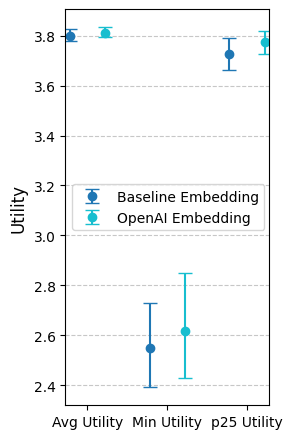

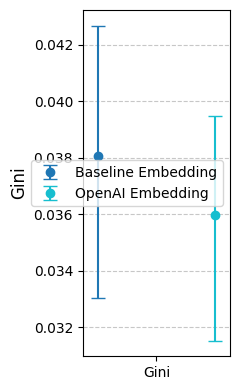

In [68]:
from generative_social_choice.utils.postprocessing import clustered_barplot_with_error_bars, plot_scalar_clustered_confidence_intervals

scalar_confidence_intervals_plot = plot_scalar_clustered_confidence_intervals(
    scalar_confidence_intervals.iloc[:,:3],
    y_label="Utility",
    legend_loc="center left",
    fig_size=(3, 4.5)
)
gini_ci_plot = plot_scalar_clustered_confidence_intervals(
    scalar_confidence_intervals.iloc[:,[3]],
    y_label="Gini",
    legend_loc="best",
    # fig_size=(2, 2)
)